<ipython-input-4-eb42ff8bf463>:24: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(t, f, LineWidth=1, label="scope_0 raw")


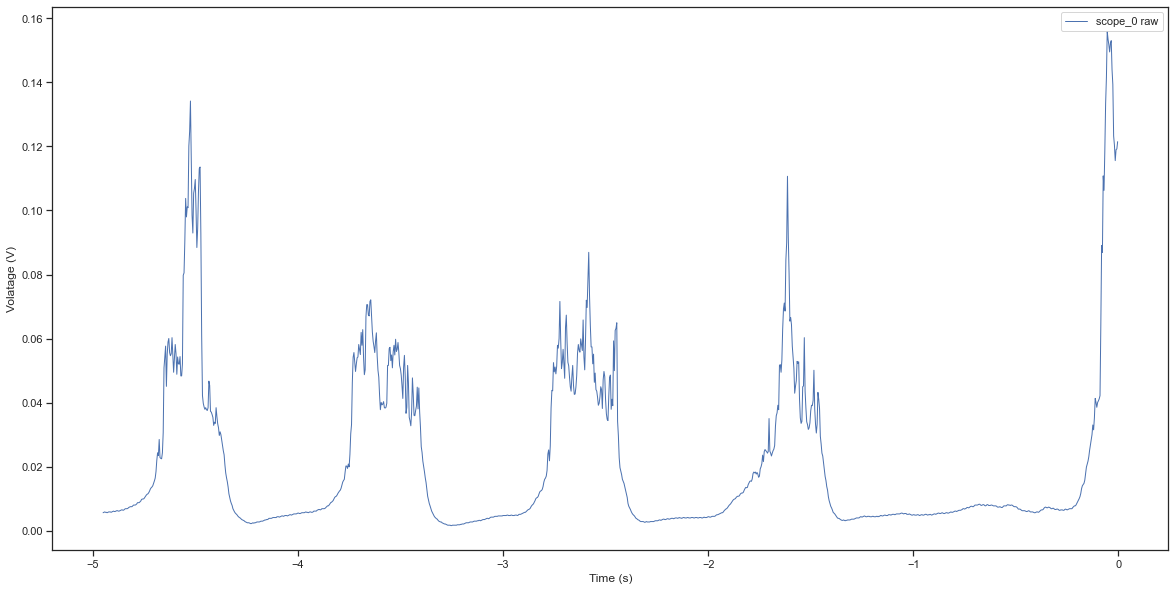

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.format_csv import csv_format
import seaborn as sns
sns.set(style='ticks')

plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams.update({'font.size': 18})

# give path to data
scope_num = 9
lab_num = 2
data = f'data/Lab_{lab_num}/Raw/scope_{scope_num}.csv'

csv_format(data)
df = pd.read_csv(data, delimiter=',', skiprows=0)

# initialise data for anaysis
dt = 1
t = df['x_axis']
f = df['channel_2']  

plt.plot(t, f, LineWidth=1, label="scope_0 raw")
plt.xlabel('Time (s)')
plt.ylabel('Volatage (V)')
plt.legend()

# save raw scope as png in data/plots
image_path = f'data/Plots/Lab_{lab_num}/scope_{scope_num}.png'
plt.savefig(image_path, dpi=300, bbox_inches='tight', transparent=False)

<ipython-input-5-96fda1e8fc9a>:12: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(t, f, color='b', LineWidth=2, label="Clean")
<ipython-input-5-96fda1e8fc9a>:18: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(freq[L], PSD[L], color='c', LineWidth=2, label="Noisy")
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


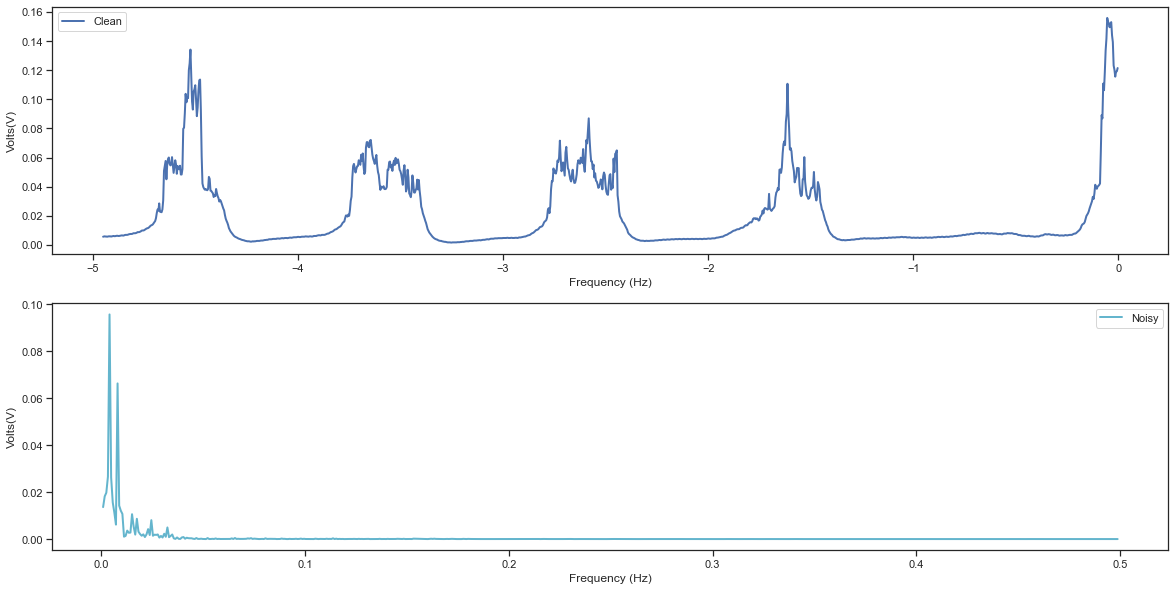

In [5]:
## Compute the Fast Fourier Transform (FFT)

n = len(t)                     
fhat = np.fft.fft(f,n)       
PSD = fhat * np.conj(fhat)/n 
freq = (1/(dt*n)) * np.arange(n)
L = np.arange(1,np.floor(n/2),dtype='int')

fig,axs = plt.subplots(2,1)

plt.sca(axs[0])
plt.plot(t, f, color='b', LineWidth=2, label="Clean")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Volts(V)")
plt.legend()

plt.sca(axs[1])
plt.plot(freq[L], PSD[L], color='c', LineWidth=2, label="Noisy")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Volts(V)")
plt.legend()

plt.show()

<ipython-input-6-92605203de8b>:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(t, f, color='c', LineWidth=1.5, label="Noisy")
<ipython-input-6-92605203de8b>:14: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(t, ffilt, color='k', LineWidth=2, label="Filtered")
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
<ipython-input-6-92605203de8b>:18: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(freq[L], PSD[L], color='c', LineWidth=2, label="Noisy")
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packa

<function matplotlib.pyplot.show(close=None, block=None)>

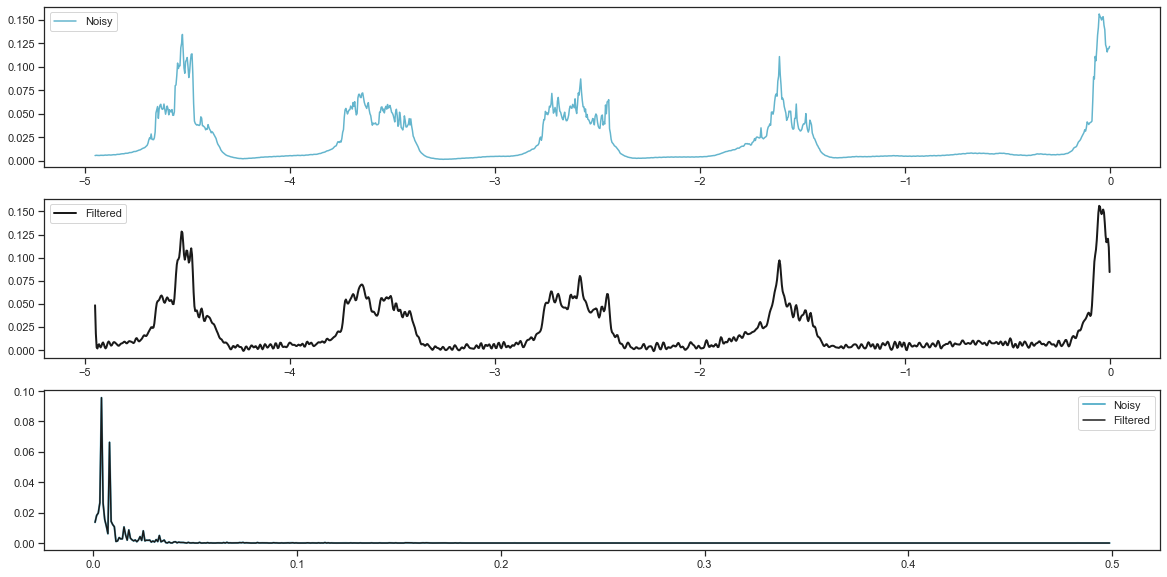

In [6]:
indices = PSD > 0.00005
PSDclean = PSD * indices
fhat = indices * fhat
ffilt = np.fft.ifft(fhat)


fig,axs = plt.subplots(3,1)

plt.sca(axs[0])
plt.plot(t, f, color='c', LineWidth=1.5, label="Noisy")
plt.legend()

plt.sca(axs[1])
plt.plot(t, ffilt, color='k', LineWidth=2, label="Filtered")
plt.legend()

plt.sca(axs[2])
plt.plot(freq[L], PSD[L], color='c', LineWidth=2, label="Noisy")
plt.plot(freq[L], PSDclean[L], color='k', LineWidth=1.5, label="Filtered")
plt.legend()

# save raw scope as png in data/plots
image_path = f'data/Plots/Lab_{lab_num}/FFT_comparison_plots/scope_{scope_num}.png'
plt.savefig(image_path, dpi=300, bbox_inches='tight', transparent=False)

plt.show